In [1]:
from CifFile import ReadCif
from mendeleev import element
from openff.toolkit.topology import Atom, Molecule, Bond
from Bio.PDB import MMCIF2Dict, MMCIFParser

In [47]:
# Helper functions and objects

# bond order dictionary translation from mmcif
bond_order_dict = {
    'SING': 1,
    'DOUB': 2,
    'TRIP': 3,
    'QUAD': 4
}


def get_atom_by_name(molecule, name: str):
    """Gets first occurrence of atom object from a molecule by its name."""
    for atom in molecule.atoms:
        if atom.name == name:
            match = atom
            break
    else:
        match = None
    return match

In [23]:
# Read the cif data file
cif_data = MMCIF2Dict.MMCIF2Dict('/home/mefisto/workdir/ChoderaLab/data/TEST_ALA-variant.cif')

In [24]:
# Dictionary symbols to atomic number
atom_symbol_list = cif_data['_chem_comp_atom.type_symbol']
elements = element(atom_symbol_list)
atomic_nums_list = []
for element_ in elements:
    atomic_nums_list.append(element_.atomic_number)
# Create dictionary
symbol_to_num_dict = {symbol: number for symbol, number in zip(atom_symbol_list, atomic_nums_list)}
symbol_to_num_dict

{'N': 7, 'C': 6, 'O': 8, 'H': 1}

# Creating OFF molecule from cif data

In [56]:
# create empty molecule to fill with data
offmol = Molecule()
# Gather necessary data for creating/adding atoms
names = cif_data['_chem_comp_atom.atom_id']
atomic_numbers = [symbol_to_num_dict[x] for x in cif_data['_chem_comp_atom.type_symbol']]
formal_charges = [int(x) for x in cif_data['_chem_comp_atom.charge']]
is_aromatic = [False if x=='N' else True for x in cif_data['_chem_comp_atom.pdbx_aromatic_flag']]
stereochemistry = [None if x == 'N' else x for x in cif_data['_chem_comp_atom.pdbx_stereo_config']]
# add atoms
# offmol.add_atom(
#     atomic_number,
#     formal_charge,
#     is_aromatic,
#     stereochemistry=None,
#     name=None,
# )
for atom_idx in range(len(names)):
    offmol.add_atom(atomic_numbers[atom_idx], 
                    formal_charges[atom_idx], 
                    is_aromatic[atom_idx], 
                    stereochemistry=stereochemistry[atom_idx],
                    name=names[atom_idx]
                   )
# Print atoms information -- debugging
print(names)
print(atomic_numbers)
print(formal_charges)
print(is_aromatic)
print(stereochemistry)
# Gather information for bonds
atom1_name_list = cif_data['_chem_comp_bond.atom_id_1']
atom2_name_list = cif_data['_chem_comp_bond.atom_id_2']
bond_order_list = [bond_order_dict[x] for x in cif_data['_chem_comp_bond.value_order']]
is_aromatic_bond_list = [False if x=='N' else True for x in cif_data['_chem_comp_bond.pdbx_aromatic_flag']]
stereochemistry_bond_list = [None if x == 'N' else x for x in cif_data['_chem_comp_bond.pdbx_stereo_config']]
# TODO: What about fractional bond order?
# add bonds
# offmol.add_bond(
#     atom1,
#     atom2,
#     bond_order,
#     is_aromatic,
#     stereochemistry=None,
#     fractional_bond_order=None,
# )
for atom_idx in range(len(atom1_name_list)):
    offmol.add_bond(get_atom_by_name(offmol, atom1_name_list[atom_idx]),
                    get_atom_by_name(offmol, atom2_name_list[atom_idx]),
                    bond_order_list[atom_idx],
                    is_aromatic_bond_list[atom_idx],
                    stereochemistry=stereochemistry_bond_list[atom_idx]
                   )
# Print bonds information -- debugging
print()
print(atom1_name_list)
print(atom2_name_list)
print(bond_order_list)
print(is_aromatic_bond_list)
print(stereochemistry_bond_list)

['N', 'CA', 'C', 'O', 'CB', 'OXT', 'H', 'H2', 'HA', 'HB1', 'HB2', 'HB3', 'HXT']
[7, 6, 6, 8, 6, 8, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[False, False, False, False, False, False, False, False, False, False, False, False, False]
[None, 'S', None, None, None, None, None, None, None, None, None, None, None]

['N', 'N', 'N', 'CA', 'CA', 'CA', 'C', 'C', 'CB', 'CB', 'CB', 'OXT']
['CA', 'H', 'H2', 'C', 'CB', 'HA', 'O', 'OXT', 'HB1', 'HB2', 'HB3', 'HXT']
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
[False, False, False, False, False, False, False, False, False, False, False, False]
[None, None, None, None, None, None, None, None, None, None, None, None]


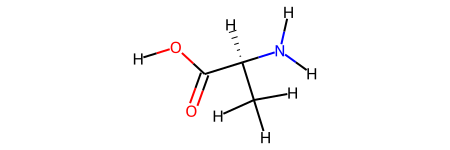

In [57]:
offmol

# TODO: Remove leaving_atom_flag atoms!